In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def file_path(question, ext):
    """
    This Function will be used to specify the csv file of the imported database
    ----
    Parameters :
    1. questions : String -> This is the Question that will be promt user to input file
    2. extension : String -> Allowed file extension, in this case is csv
    """
    while True:
        try:
            file = Path(input(question))
            if file.exists() and file.is_file and file.suffix in ext:
                return file
        except:
            print('File not suitable, please retry')

## INPUT Dataset
MOD Data Historical from Jan 2023 to Jan 2025

In [2]:
csv = file_path('Masukkan File CSV  : ','.csv')
dataset = pd.read_csv(csv)
dataset


Masukkan File CSV  :  MODData_Pandas28022025A.csv


,Month,OB (Bcm),Coal (Ton),Distance OB (KM),Distance Coal (KM),Fuel
0,Jan-23,17384635.26,1168560.890,4.049147,13.133206,30019859
1,Feb-23,15768223.79,1167988.800,4.001956,13.356853,28741904
2,Mar-23,19750434.03,1374953.690,3.647640,13.541760,33406642
3,Apr-23,17571138.89,1394514.550,3.527485,12.664754,28702688
4,May-23,18533067.06,1573064.010,3.879662,11.887406,32465717
5,Jun-23,18649038.45,1563274.160,3.722715,10.891598,31244147
6,Jul-23,20742898.38,1683865.840,3.827571,12.961600,33571132
7,Aug-23,23445864.03,1764668.400,3.731248,13.410723,35625395
8,Sep-23,21119800.96,1754962.710,3.829266,12.107981,33384423
9,Oct-23,22294833.78,2017816.930,4.198328,11.989467,36447204


## Checking for Linearity
Before you execute a linear regression model, it is advisable to validate that certain assumptions are met.
To perform a quick linearity check, we can use scatter diagrams (utilizing the matplotlib library).

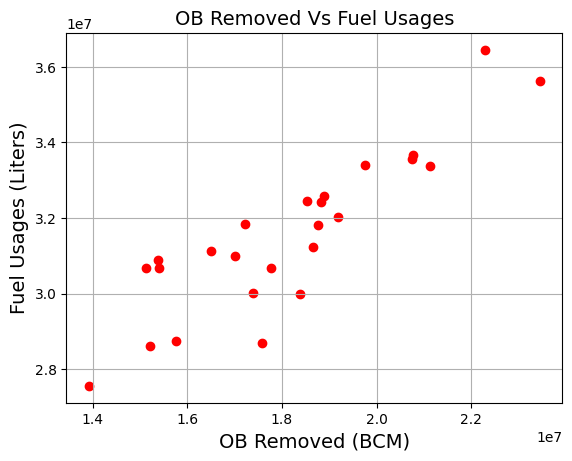

In [3]:
plt.scatter(dataset['OB (Bcm)'], dataset['Fuel'], color='red')
plt.title('OB Removed Vs Fuel Usages', fontsize=14)
plt.xlabel('OB Removed (BCM)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

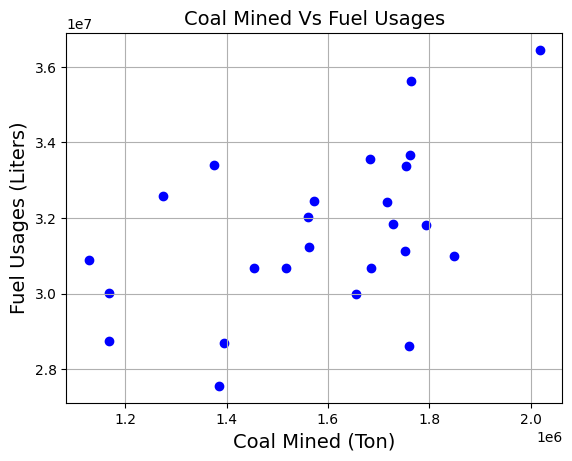

In [4]:
plt.scatter(dataset['Coal (Ton)'], dataset['Fuel'], color='blue')
plt.title('Coal Mined Vs Fuel Usages', fontsize=14)
plt.xlabel('Coal Mined (Ton)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

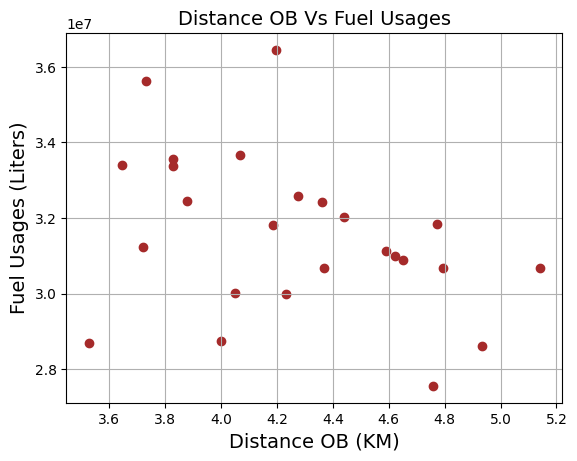

In [5]:
plt.scatter(dataset['Distance OB (KM)'], dataset['Fuel'], color='brown')
plt.title('Distance OB Vs Fuel Usages', fontsize=14)
plt.xlabel('Distance OB (KM)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

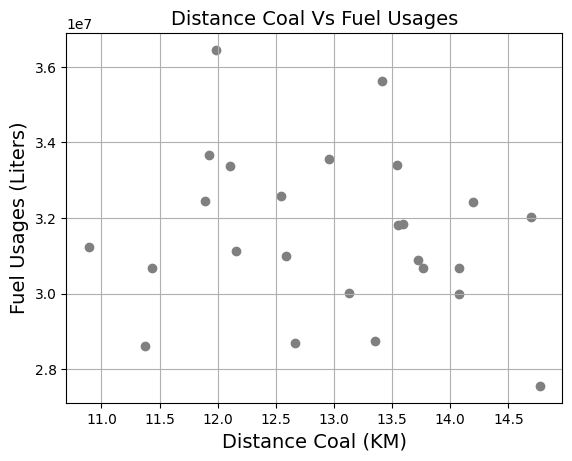

In [6]:
plt.scatter(dataset['Distance Coal (KM)'], dataset['Fuel'], color='gray')
plt.title('Distance Coal Vs Fuel Usages', fontsize=14)
plt.xlabel('Distance Coal (KM)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

## From Linearity test above we found that OB Removed, and Coal (Ton) have linier relantionship with Fuel Usages

In [7]:
dataset = dataset.drop(['Month'], axis=1)

In [8]:
correlations = dataset.corr()
correlations['Fuel'].round(2)

OB (Bcm)              0.88
Coal (Ton)            0.50
Distance OB (KM)     -0.37
Distance Coal (KM)   -0.17
Fuel                  1.00
Name: Fuel, dtype: float64

## From Corelation above 
We found that OB and Coal have corelation to Fuel, which have corelation point >= 0.5

In [9]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, LeaveOneOut
import statsmodels.api as sm
import seaborn as sns

## Checking Outliers

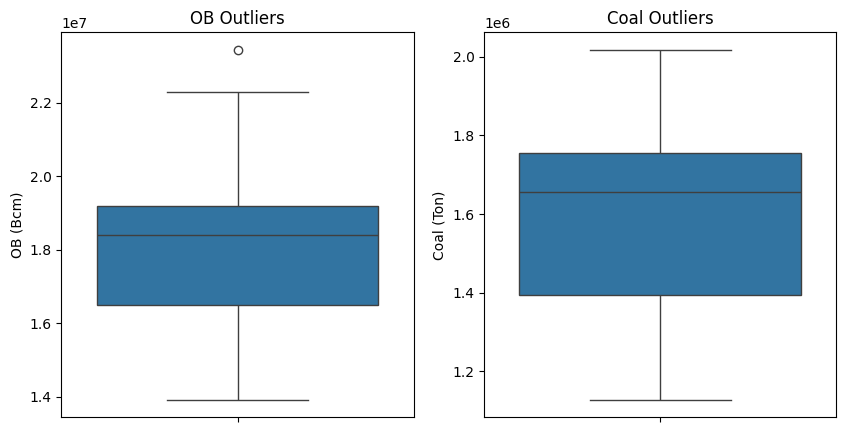

In [10]:
# Create box plots for each feature
plt.figure(figsize=(10, 5))

# OB Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(y=dataset['OB (Bcm)'])
plt.title("OB Outliers")

# Coal Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=dataset['Coal (Ton)'])
plt.title("Coal Outliers")

plt.show()

In [17]:
# Compute IQR
Q1 = dataset[['OB (Bcm)', 'Coal (Ton)']].quantile(0.25)
Q3 = dataset[['OB (Bcm)', 'Coal (Ton)']].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((dataset[['OB (Bcm)', 'Coal (Ton)']] < lower_bound) | (dataset[['OB (Bcm)', 'Coal (Ton)']] > upper_bound))

# Get row indices of outliers
outlier_indices = dataset[outliers.any(axis=1)].index
outlier_masks = dataset[outliers.any(axis=1)]
print("Outlier indices:", outlier_indices)

outlier_rows = dataset.loc[outlier_indices]
print(outlier_rows)

Outlier indices: Index([7], dtype='int64')
      OB (Bcm)  Coal (Ton)  Distance OB (KM)  Distance Coal (KM)      Fuel
7  23445864.03   1764668.4          3.731248           13.410723  35625395


## Clean Dataset without Outliers

In [18]:
dataset = dataset.drop(index=outlier_indices)  # Keep only rows without outliers
dataset

,OB (Bcm),Coal (Ton),Distance OB (KM),Distance Coal (KM),Fuel
0,17384635.26,1168560.890,4.049147,13.133206,30019859
1,15768223.79,1167988.800,4.001956,13.356853,28741904
2,19750434.03,1374953.690,3.647640,13.541760,33406642
3,17571138.89,1394514.550,3.527485,12.664754,28702688
4,18533067.06,1573064.010,3.879662,11.887406,32465717
5,18649038.45,1563274.160,3.722715,10.891598,31244147
6,20742898.38,1683865.840,3.827571,12.961600,33571132
8,21119800.96,1754962.710,3.829266,12.107981,33384423
9,22294833.78,2017816.930,4.198328,11.989467,36447204
10,20776000.54,1761585.720,4.067368,11.922033,33659338


In [20]:
correlations = dataset.corr()
correlations['Fuel'].round(2)

OB (Bcm)              0.85
Coal (Ton)            0.48
Distance OB (KM)     -0.30
Distance Coal (KM)   -0.22
Fuel                  1.00
Name: Fuel, dtype: float64

## Features & Target
Features (x) : Independent Variables = OB and Coal
Target (y) : Dependent Variable = Fuel

In [21]:
x = dataset[['OB (Bcm)','Coal (Ton)']]
y = dataset['Fuel']
 
# Split dataset (70% Train, 30% Test) For Evaluation
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [22]:
# ==============================
# Linear Regression (sklearn)
# ==============================
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predictions
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

In [24]:
# Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Cross-Validation (2-fold)
kf = KFold(n_splits=2, shuffle=True, random_state=42)
loo = LeaveOneOut()
cv_scores = cross_val_score(regr, X_train, y_train, cv=kf, scoring='r2')

# Print Results
print("\n Model Performance Metrics:")
print(f"Train MSE: {train_mse:.3f} | Test MSE: {test_mse:.3f}")
print(f"Train MAE: {train_mae:.3f} | Test MAE: {test_mae:.3f}")
print(f"Train R² Score: {train_r2:.3f} | Test R² Score: {test_r2:.3f}")

print("\n Cross-Validation Results:")
print(f"R² Scores for each fold: {cv_scores.round(3)}")
print(f"Mean R² Score: {cv_scores.mean():.3f} | Std Dev: {cv_scores.std():.3f}")


 Model Performance Metrics:
Train MSE: 1087585040364.213 | Test MSE: 1054373938822.893
Train MAE: 872170.558 | Test MAE: 789900.664
Train R² Score: 0.588 | Test R² Score: 0.824

 Cross-Validation Results:
R² Scores for each fold: [-0.724 -0.902]
Mean R² Score: -0.813 | Std Dev: 0.089


In [25]:
# ==============================
# Linear Regression (statsmodels)
# ==============================
regr = linear_model.LinearRegression()
regr.fit(x, y)
print("Final Model Intercept:", regr.intercept_)
print("Final Model Coefficients:", regr.coef_)

X_const = sm.add_constant(x)  # Add constant for intercept
model = sm.OLS(y, X_const).fit()
print("\n📌 Statsmodels Regression Summary:")
print(model.summary())

Final Model Intercept: 16317032.347071799
Final Model Coefficients: [0.72974427 1.274269  ]

📌 Statsmodels Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                   Fuel   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     31.33
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           4.97e-07
Time:                        16:37:47   Log-Likelihood:                -364.95
No. Observations:                  24   AIC:                             735.9
Df Residuals:                      21   BIC:                             739.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----

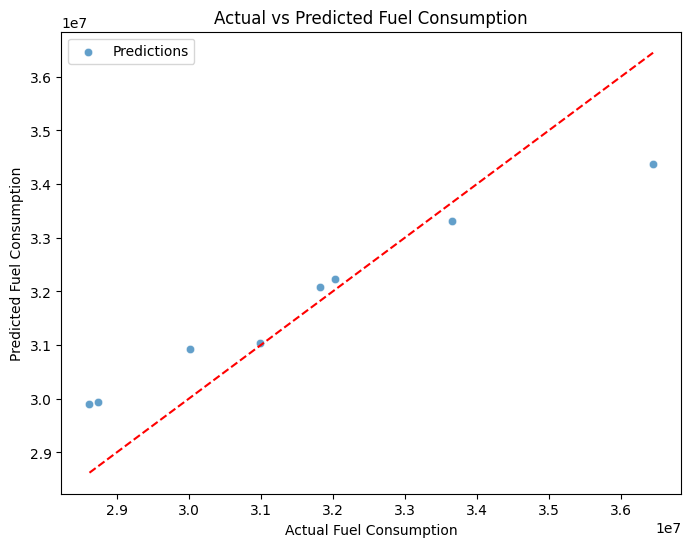

In [26]:
# ==============================
# Plot: Actual vs Predicted
# ==============================
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.7, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fuel Consumption")
plt.ylabel("Predicted Fuel Consumption")
plt.title("Actual vs Predicted Fuel Consumption")
plt.legend()
plt.show()